# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

# Load the Data

In [2]:
# Replace with your path to train.csv and test.csv
train_data_path = 'train.csv'
test_data_path = 'test.csv'

train_data = pd.read_csv(train_data_path)
test_data = pd.read_csv(test_data_path)

# Data Cleaning

In [3]:
# Checking for missing values in both datasets
train_missing = train_data.isnull().sum()
test_missing = test_data.isnull().sum()

In [4]:
train_missing

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
test_missing

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [6]:
# Filling missing values
# For Age, we can fill missing values with the median age
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
test_data['Age'].fillna(test_data['Age'].median(), inplace=True)

# For Embarked in train data, fill with the mode (most frequent value)
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)

# For Cabin, due to a large number of missing values, we create a new category for missing
train_data['Cabin'].fillna('Unknown', inplace=True)
test_data['Cabin'].fillna('Unknown', inplace=True)

# For Fare in test data, fill with the median fare
test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)

# Convert 'Sex' to a numerical variable
train_data['Sex'] = train_data['Sex'].map({'female': 1, 'male': 0})
test_data['Sex'] = test_data['Sex'].map({'female': 1, 'male': 0})


# Feature Engineering

In [7]:
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1
test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch'] + 1

# Dropping unnecessary columns
train_data.drop(['Ticket', 'Cabin', 'Name', 'PassengerId'], axis=1, inplace=True)
test_data.drop(['Ticket', 'Cabin', 'Name', 'PassengerId'], axis=1, inplace=True)

# Converting 'Embarked' to numerical values
train_data['Embarked'] = train_data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
test_data['Embarked'] = test_data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# Exploratory Data Analysis (EDA)

In [8]:
# Combining train and test data for EDA
combined_data = pd.concat([train_data, test_data], sort=False)

# Survival rate by different variables
survival_by_class = train_data.groupby('Pclass')['Survived'].mean()
survival_by_sex = train_data.groupby('Sex')['Survived'].mean()
survival_by_embarked = train_data.groupby('Embarked')['Survived'].mean()

In [9]:
# Check the counts of each sex
print(train_data['Sex'].value_counts())

Sex
0    577
1    314
Name: count, dtype: int64


In [10]:
# Check the counts of each sex
print(test_data['Sex'].value_counts())

Sex
0    266
1    152
Name: count, dtype: int64


Text(0.5, 0, 'Class')

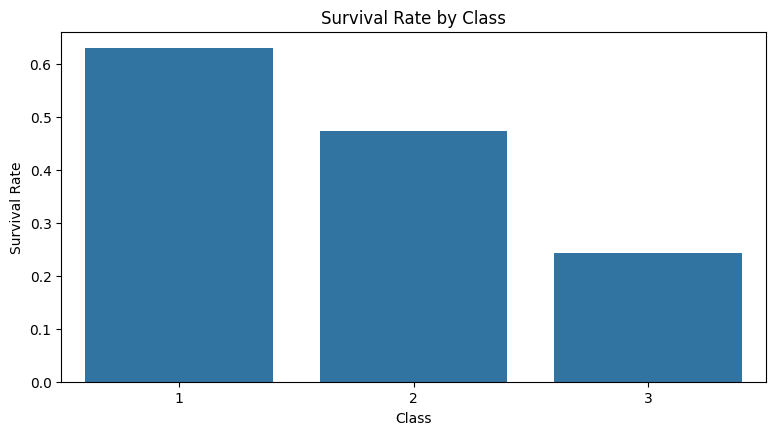

In [11]:
# Correlation matrix
correlation_matrix = combined_data.corr()

# Visualizations
plt.figure(figsize=(20, 10))

# Survival rate by Class
plt.subplot(2, 2, 1)
sns.barplot(x=survival_by_class.index, y=survival_by_class.values)
plt.title('Survival Rate by Class')
plt.ylabel('Survival Rate')
plt.xlabel('Class')

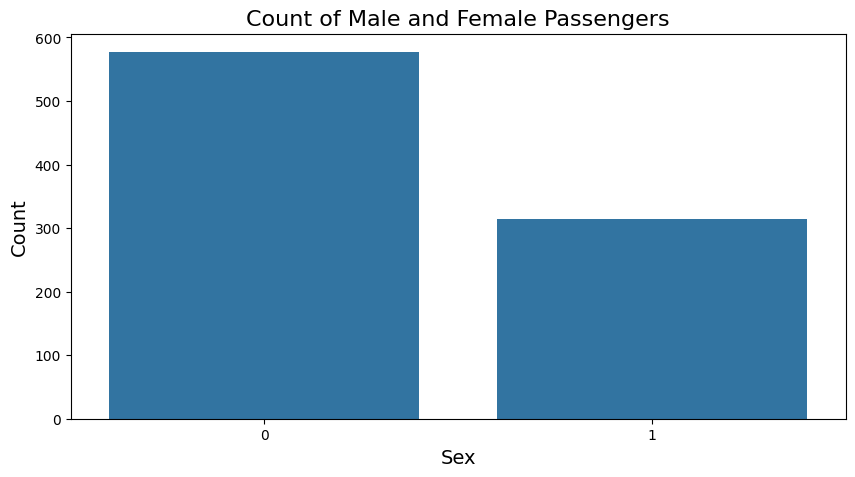

In [12]:
# Graph 4: Count of Male and Female Passengers
plt.figure(figsize=(10, 5))
sns.countplot(x='Sex', data=train_data)
plt.title('Count of Male and Female Passengers', fontsize=16)
plt.xlabel('Sex', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

Text(0.5, 0, 'Sex (0 = Male, 1 = Female)')

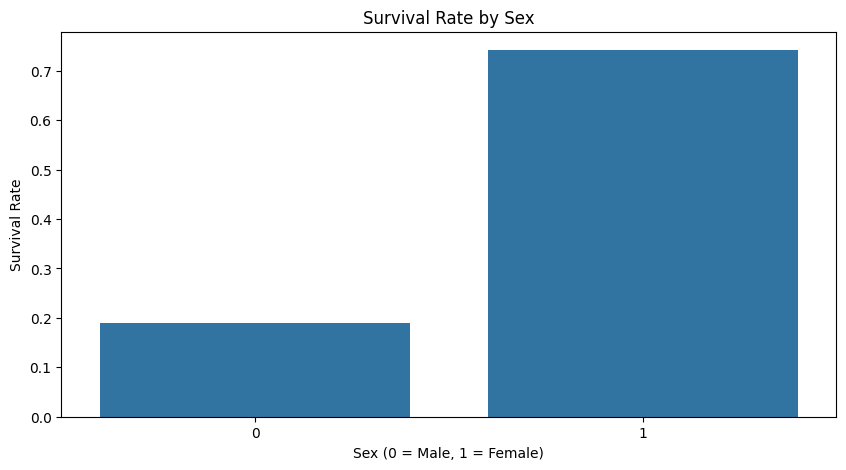

In [13]:
# Survival rate by Sex
plt.figure(figsize=(10, 5))
sns.barplot(x=survival_by_sex.index, y=survival_by_sex.values)
plt.title('Survival Rate by Sex')
plt.ylabel('Survival Rate')
plt.xlabel('Sex (0 = Male, 1 = Female)')

Text(0.5, 0, 'Embarking Port')

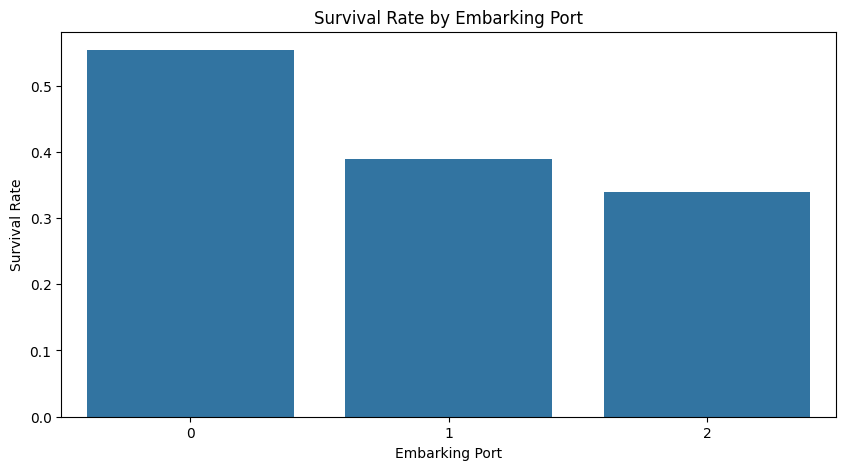

In [14]:
# Survival rate by Embarked
plt.figure(figsize=(10, 5))
sns.barplot(x=survival_by_embarked.index, y=survival_by_embarked.values)
plt.title('Survival Rate by Embarking Port')
plt.ylabel('Survival Rate')
plt.xlabel('Embarking Port')

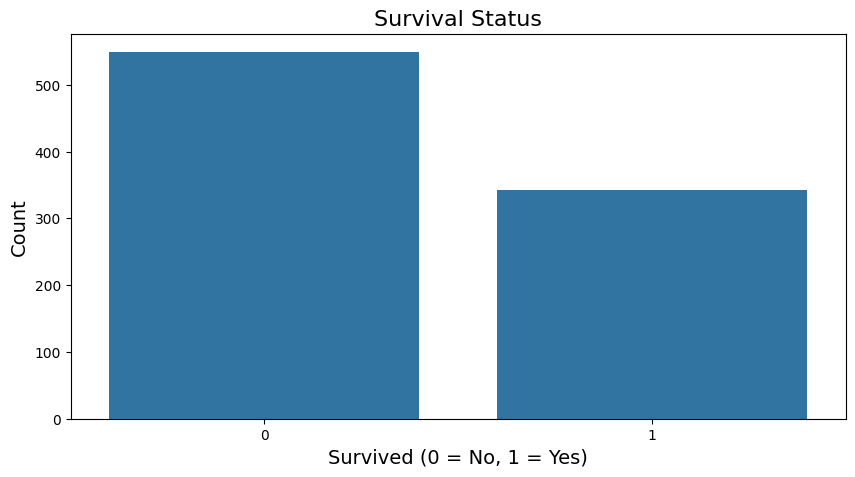

In [15]:
plt.figure(figsize=(10, 5))
# Graph 1: Survival Status

sns.countplot(x='Survived', data=train_data)
plt.title('Survival Status', fontsize=16)
plt.xlabel('Survived (0 = No, 1 = Yes)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

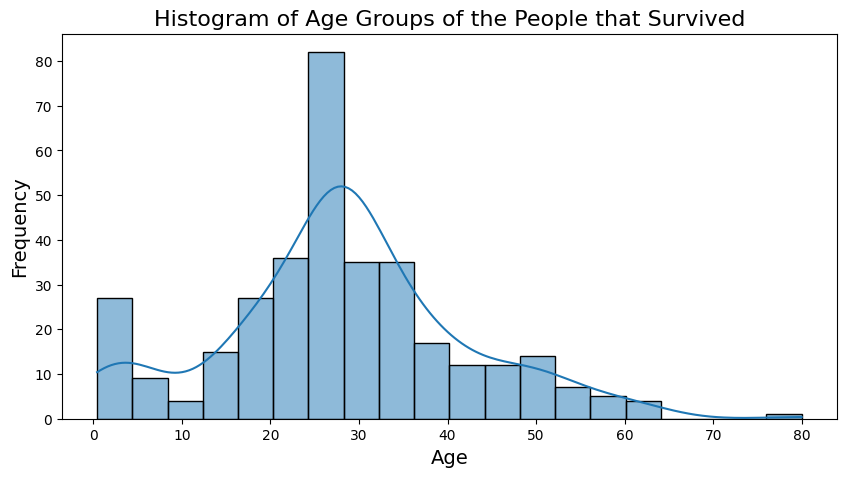

In [16]:
# Graph 2: Histogram of Age Groups of Survivors
plt.figure(figsize=(10, 5))
sns.histplot(data=train_data[train_data['Survived'] == 1], x='Age', bins=20, kde=True)
plt.title('Histogram of Age Groups of the People that Survived', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

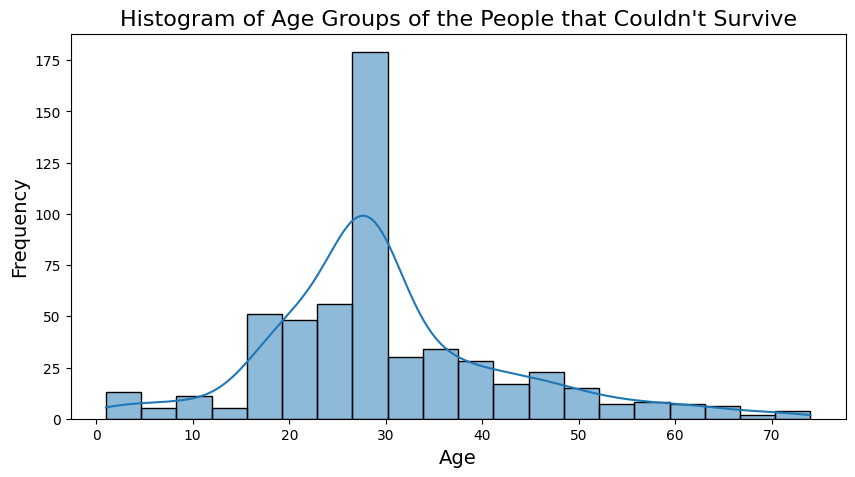

In [17]:
# Graph 3: Histogram of Age Groups of Non-Survivors
plt.figure(figsize=(10, 5))
sns.histplot(data=train_data[train_data['Survived'] == 0], x='Age', bins=20, kde=True)
plt.title('Histogram of Age Groups of the People that Couldn\'t Survive', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

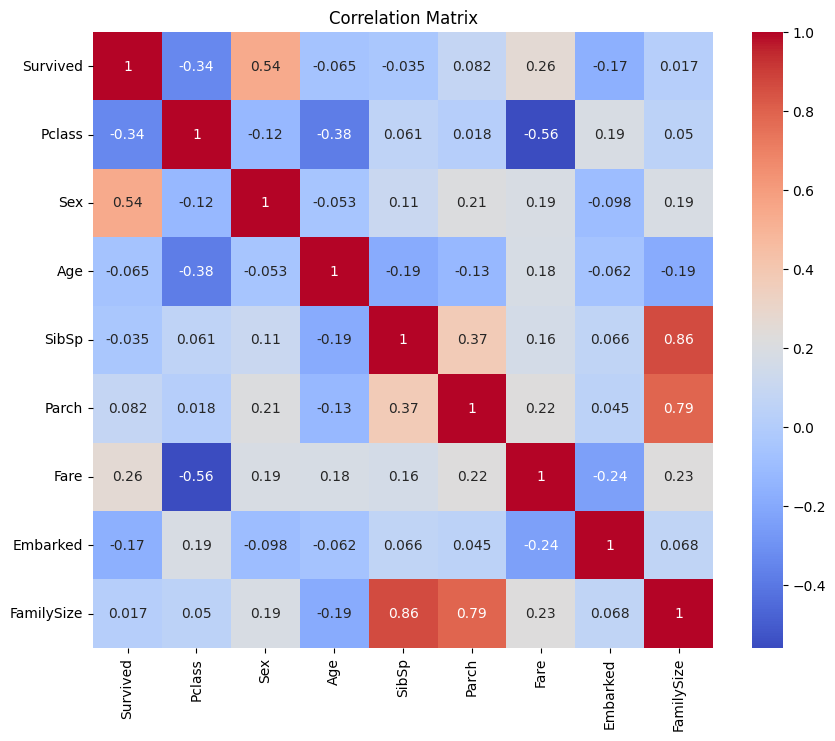

In [18]:
# Visualization
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

 # Model Training and Evaluation

In [19]:
# Splitting the data into training and testing sets
X = train_data.drop("Survived", axis=1)
y = train_data["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Logistic Regression Model

In [20]:
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model with increased max_iter and a different solver
log_reg = LogisticRegression(max_iter=1000, solver='saga')
log_reg.fit(X_train_scaled, y_train)

# Predictions and accuracy
y_pred_log_reg = log_reg.predict(X_test_scaled)
log_reg_acc = accuracy_score(y_test, y_pred_log_reg)

In [21]:
log_reg_acc

0.7988826815642458

In [22]:
confusion_mat = confusion_matrix(y_test, y_pred_log_reg)
print(confusion_mat)

[[92 18]
 [18 51]]


In [23]:
print(classification_report(y_test,y_pred_log_reg))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       110
           1       0.74      0.74      0.74        69

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



# K-Nearest Neighbors Model

In [24]:
# K-Nearest Neighbors Model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
knn_acc = accuracy_score(y_test, y_pred_knn)

In [25]:
knn_acc

0.7486033519553073

In [26]:
confusion_mat = confusion_matrix(y_test, y_pred_knn)
print(confusion_mat)

[[94 16]
 [29 40]]


In [27]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.76      0.85      0.81       110
           1       0.71      0.58      0.64        69

    accuracy                           0.75       179
   macro avg       0.74      0.72      0.72       179
weighted avg       0.74      0.75      0.74       179



# Gaussian Naive Bayes Model

In [28]:
# Gaussian Naive Bayes Model
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)
gnb_acc = accuracy_score(y_test, y_pred_gnb)

In [29]:
gnb_acc

0.7988826815642458

In [30]:
confusion_mat = confusion_matrix(y_test, y_pred_gnb)
print(confusion_mat)

[[89 21]
 [15 54]]


In [31]:
print(classification_report(y_test,y_pred_gnb))

              precision    recall  f1-score   support

           0       0.86      0.81      0.83       110
           1       0.72      0.78      0.75        69

    accuracy                           0.80       179
   macro avg       0.79      0.80      0.79       179
weighted avg       0.80      0.80      0.80       179



# Decision Tree Model

In [32]:
# Decision Tree Model
decision_tree = DecisionTreeClassifier(criterion='entropy', random_state=0)
decision_tree.fit(X_train, y_train)
y_pred_decision_tree = decision_tree.predict(X_test)
decision_tree_acc = accuracy_score(y_test, y_pred_decision_tree)

In [33]:
decision_tree_acc

0.770949720670391

In [34]:
confusion_mat = confusion_matrix(y_test, y_pred_decision_tree)
print(confusion_mat)

[[89 21]
 [20 49]]


In [35]:
print(classification_report(y_test, y_pred_decision_tree))

              precision    recall  f1-score   support

           0       0.82      0.81      0.81       110
           1       0.70      0.71      0.71        69

    accuracy                           0.77       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.77      0.77      0.77       179



# Results

In [36]:
# Results
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'Gaussian Naive Bayes', 'Decision Tree'],
    'Accuracy Score': [log_reg_acc, knn_acc, gnb_acc, decision_tree_acc]
})

results

,Model,Accuracy Score
0,Logistic Regression,0.798883
1,KNN,0.748603
2,Gaussian Naive Bayes,0.798883
3,Decision Tree,0.770950
